### 02/06 정리
### 높은 등급의 특징

아래 특징의 비율이 등급이 높을수록 높았음

아래 특징들을 바탕으로 파생변수를 만들 수 있을 거 같음

- 대출기간 : 단기

- 근로기간 : 장기

- 주택상태 : 전세

- 대출목적 : 부채통합


'sudo' is not recognized as an internal or external command,
operable program or batch file.


'sudo' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
## 데이터 갯수

df = pd.read_csv('open/train.csv')
df.head()

In [ ]:
X = df.drop('대출등급', axis=1)
y = df['대출등급']

from sklearn.model_selection import train_test_split

X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

'''
부채_대비_소득_비율 : 4분위수 사용해서 이상치 제거
연간소득 : 4분위수 사용해서 이상치 제거
총상환원금 : 4분위수 사용해서 이상치 제거
총상환이자 : 4분위수 사용해서 이상치 제거
총계좌수 : 4분위수 사용해서 이상치 제거

스캐일러 정하기
MinMax
Standard


'''



category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

'''
근로기간 : unknown = -1
주택소유상태 : any 삭제


인코딩
onehot - 대출기간, 주택소유상태, 대출목적
label - 근로기간




모델
다중분류 모델
sklearn.cluster.Kmeans
randomforestclassifier()
의사결정나무classifier()

'''

In [66]:
df['총계좌수'].mean()

25.304937066422962

In [65]:
df['총계좌수'].sort_values(ascending=False).head(20)

57818    169
68579    151
66990    140
29684    130
39386    127
82641    125
94491    112
94881    110
28174    109
48807    106
94793    105
31923    105
63468    102
30442    102
61985    102
989      101
39031     99
69164     99
49470     98
90885     98
Name: 총계좌수, dtype: int64

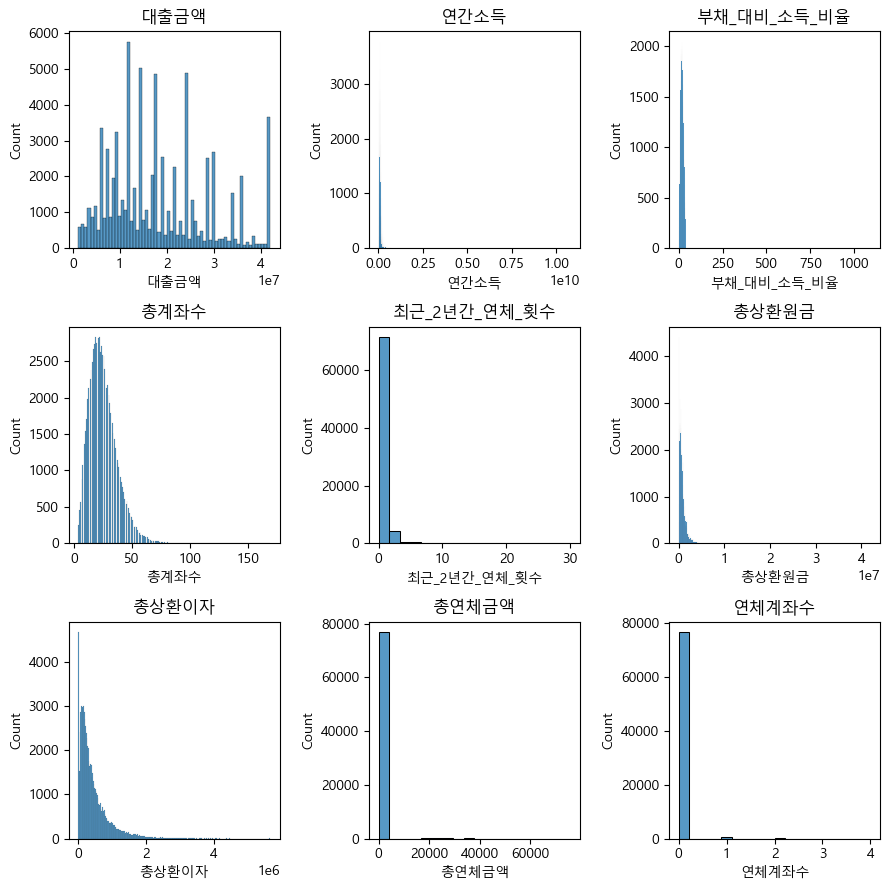

In [58]:
def get_3_hist(data:pd.DataFrame, columns:list):
    
    plt.figure(figsize=(9, 9))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(3, 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

get_3_hist(X_train, numeric_col)

d:\Users\dhwns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\dhwns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\dhwns\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\dhwns\anaconda3\lib\si

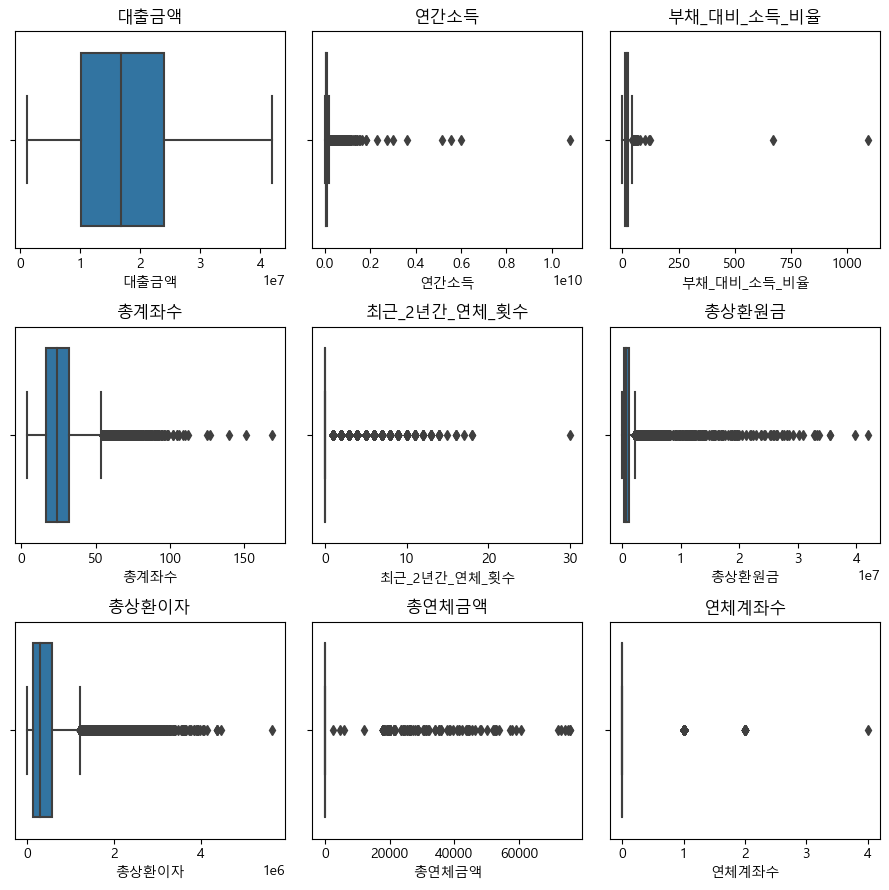

In [18]:
def get_3_box(data:pd.DataFrame, columns:list):
    
    plt.figure(figsize=(9, 9))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(3, 3, i + 1)
        # 히스토그램 그리기
        sns.boxplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

get_3_box(X_train, numeric_col)

In [10]:
for col in df.columns:
    print(col, df[col].unique())

ID ['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_96291' 'TRAIN_96292'
 'TRAIN_96293']
대출금액 [12480000 14400000 12000000 ...  1650000 36240000 39450000]
대출기간 [' 36 months' ' 60 months']
근로기간 ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 ['RENT' 'MORTGAGE' 'OWN' 'ANY']
연간소득 [ 72000000 130800000  96000000 ...  78602400  83094000  66330000]
부채_대비_소득_비율 [18.9  22.33  8.6  ... 63.64 71.4  52.8 ]
총계좌수 [ 15  21  14  19  30  22  45  11  26  10  24  17  35  20   9  36  16  59
  29  12  28  31   8  37   6   7  13  25  46  18  42  32  63  38  43  23
  39  33  27  76   5  40  41  50  55  61  51  53  52  62  81  34  47  48
  44   4  64  56  54  67  49  72  69  57  66  73  65 101  58  85  86  97
  60  71  70  78  75  68  79  77  95  84  74  80  90  93  96  89  91  94
  82  87 109 130 102 105  92  99 127 106  98  83 169 140 151  88 125 112
 110]
대출목적 ['부채 통합' '주택 개선' '주요 구매'

In [38]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '-1').strip()
    output = int(output)

    return output

In [39]:
df['근로기간'] = df['근로기간'].apply(year_encoder)

In [47]:
drop_index = df[df['주택소유상태'] == 'ANY'].index

df = df.drop(drop_index)

In [55]:
drop_index = df[df['부채_대비_소득_비율'] == 9999].index
df = df.drop(drop_index)

In [48]:
df['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

### 등급별 특징 확인

In [38]:
category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적', '최근_2년간_연체_횟수']

for col in category_col:
    print(col)
    display(df[df['대출등급'] == "A"][col].value_counts() / df[df['대출등급'] == "A"][col].value_counts().sum())
    print('----------------------------------')

## 대출기간 : 단기
## 근로기간 : 장기
## 주택상태 : 전세
## 대출목적 : 부채통합

대출기간


 36 months    0.951109
 60 months    0.048891
Name: 대출기간, dtype: float64

----------------------------------
근로기간


10+ years    0.350107
2 years      0.086692
3 years      0.077212
< 1 year     0.075244
1 year       0.061114
5 years      0.058788
4 years      0.057775
Unknown      0.055688
8 years      0.051693
6 years      0.038755
9 years      0.037026
7 years      0.036907
10+years     0.008168
<1 year      0.003279
3            0.001192
1 years      0.000358
Name: 근로기간, dtype: float64

----------------------------------
주택소유상태


MORTGAGE    0.574767
RENT        0.314095
OWN         0.111138
Name: 주택소유상태, dtype: float64

----------------------------------
대출목적


부채 통합     0.479132
신용 카드     0.383019
주택 개선     0.073038
주요 구매     0.022180
기타        0.021226
자동차       0.010374
의료        0.006201
휴가        0.002385
소규모 사업    0.001133
이사        0.000775
주택        0.000477
재생 에너지    0.000060
Name: 대출목적, dtype: float64

----------------------------------
최근_2년간_연체_횟수


0     0.857202
1     0.101956
2     0.024446
3     0.008228
4     0.004174
5     0.001968
6     0.000835
10    0.000298
7     0.000298
8     0.000238
9     0.000119
18    0.000060
14    0.000060
15    0.000060
13    0.000060
Name: 최근_2년간_연체_횟수, dtype: float64

----------------------------------


In [20]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, random_state=42)

In [23]:
kmeans.fit(X_train)

ValueError: could not convert string to float: 'TRAIN_53293'